<a href="https://colab.research.google.com/github/Mounil2005/100-days-of-code/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Descriptive Statistics

In [10]:
import pandas as pd
import json
import re
import nltk
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Assuming the file is in the default 'MyDrive' folder in Google Drive
with open('/content/drive/MyDrive/train_dataset.json', 'r') as f:
    data = json.load(f)

# Parse JSON into a list of dictionaries
parsed_data = []
for record in data:
    # Extract data from 'input' and 'output' based on expected format
    input_text = record.get('input', '')
    output_text = record.get('output', '')

    # Use regex to extract information. Adjust patterns based on actual data structure
    tone_match = re.search(r'Tone: (.*?)\n', input_text)
    emotion_match = re.search(r'Emotion: (.*?)\n', input_text)
    # Assuming the answer is everything after "A:" in the input or the entire output
    answer_match_input = re.search(r'A: (.*)', input_text, re.DOTALL)

    extracted_data = {
        'Question': input_text.split('Q: ')[-1].split('\n')[0] if 'Q: ' in input_text else '',
        'Tone': tone_match.group(1).strip() if tone_match else '',
        'Emotion': emotion_match.group(1).strip() if emotion_match else '',
        'Answer': output_text.strip() # Assuming output is the answer
    }
    # If answer is in input and not output, use that
    if answer_match_input and not extracted_data['Answer']:
         extracted_data['Answer'] = answer_match_input.group(1).strip()


    parsed_data.append(extracted_data)


# Create a DataFrame
df = pd.DataFrame(parsed_data)

# Clean and standardize tone/emotion labels (example: convert to lowercase)
df['Tone'] = df['Tone'].str.lower()
df['Emotion'] = df['Emotion'].str.lower()

# Extract features: response_length
df['response_length'] = df['Answer'].apply(lambda x: len(x.split()))

# Encode tone & emotion numerically
tone_encoder = LabelEncoder()
df['Tone_encoded'] = tone_encoder.fit_transform(df['Tone'])

emotion_encoder = LabelEncoder()
df['Emotion_encoded'] = emotion_encoder.fit_transform(df['Emotion'])

# Display the first few rows and info of the processed DataFrame
display(df.head())
df.info()

,Question,Tone,Emotion,Answer,response_length,Tone_encoded,Emotion_encoded
0,"You accidentally hurt someone emotionally, and...","thinking, calm",empathy and understanding others,If I accidentally hurt someone emotionally and...,26,626,4
1,How would you describe your personality and th...,"direct, confident",neutral,I would describe myself as an ambitious and cu...,20,185,10
2,How do you handle situations where you want to...,thinks,emotional growth and self reflection,"When I want to forgive but find it difficult, ...",31,635,3
3,Can you recall a time when you unintentionally...,"decisive, optimistic",emotional growth and self reflection,"Yeah, when I first came to Manipal, I was surp...",65,167,3
4,You look back at a past emotional reaction and...,"truthful, open",emotional growth and self reflection,"When I look back at past emotional reactions, ...",29,693,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Question         1411 non-null   object
 1   Tone             1411 non-null   object
 2   Emotion          1411 non-null   object
 3   Answer           1411 non-null   object
 4   response_length  1411 non-null   int64 
 5   Tone_encoded     1411 non-null   int64 
 6   Emotion_encoded  1411 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 77.3+ KB


In [9]:
# Display the column names of the DataFrame to identify the correct key
print(df.columns)

Index(['input', 'output'], dtype='object')


Descriptive Statistics for Response Length:


,response_length
count,1411.000000
mean,30.661233
std,9.575681
min,8.000000
25%,24.000000
50%,30.000000
75%,36.000000
max,89.000000



Frequency of Emotions:


,count
Emotion,
emotional growth and self reflection,324
happiness and joy,196
love & affection,191
fear & anxiety,142
neutral,109
gratitude and contentment,90
sadness and grief,89
anger & frustration,86
confidence and self belief,75



Frequency of Tones:


,count
Tone,
direct,88
calm,42
thoughtful,33
confident,32
clear,23
...,...
"thoughtful,direct",1
"relaxed, casual",1
"enthusiastic, excited",1


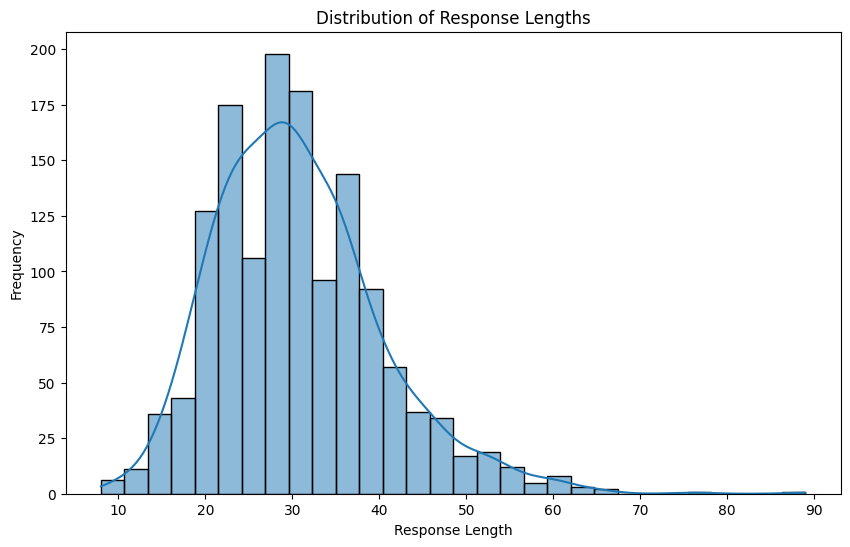

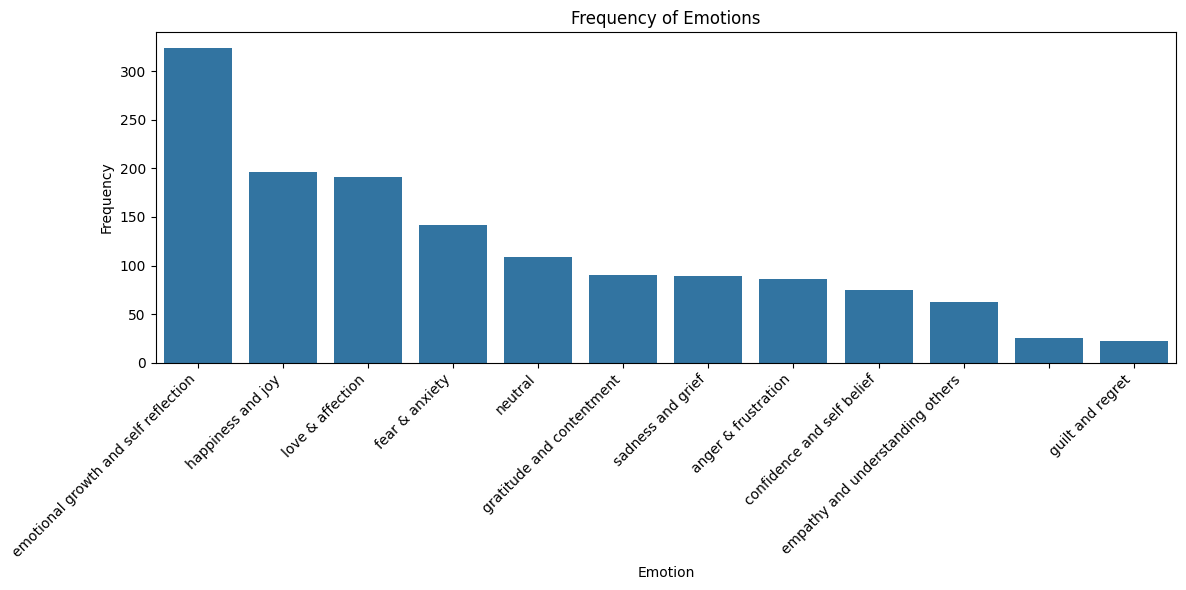

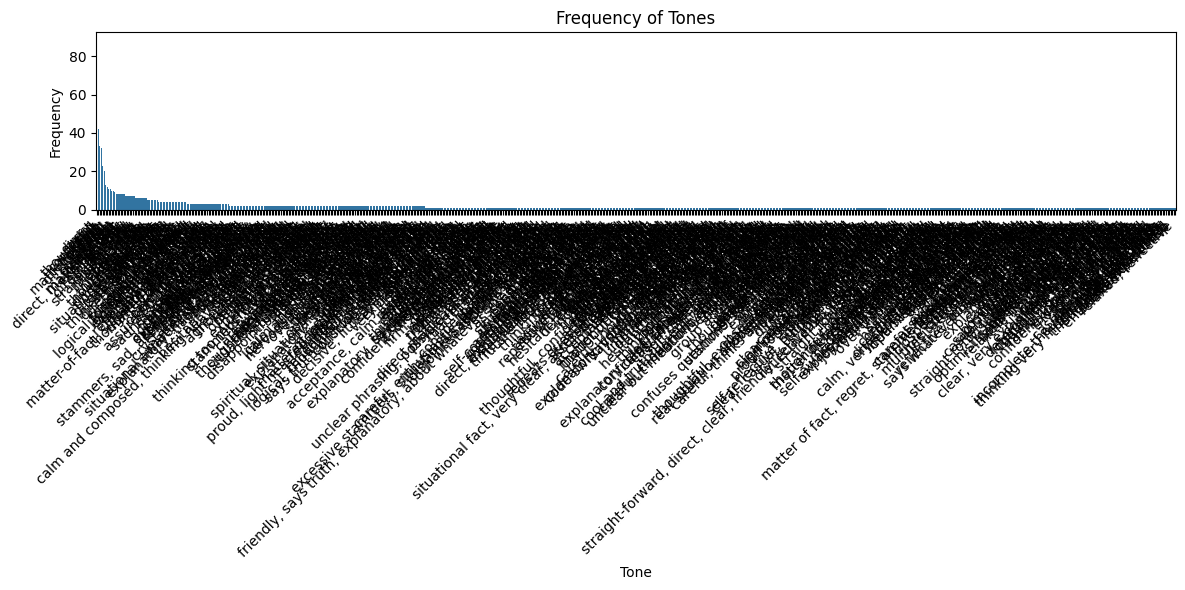

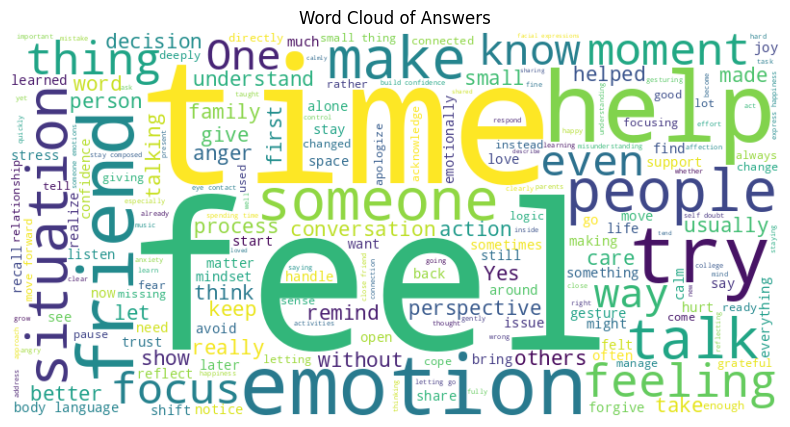

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud

# Descriptive statistics for response length
print("Descriptive Statistics for Response Length:")
display(df['response_length'].describe())

# Frequency of emotions
print("\nFrequency of Emotions:")
emotion_counts = df['Emotion'].value_counts()
display(emotion_counts)

# Frequency of tones
print("\nFrequency of Tones:")
tone_counts = df['Tone'].value_counts()
display(tone_counts)

# Removed analysis for 'Response_Time' as the column does not exist
# print("\nFrequency of Response Times:")
# if df['Response_Time'].dtype == 'object':
#     response_time_counts = df['Response_Time'].value_counts()
#     display(response_time_counts)
# else:
#     print("Response_Time is not a categorical variable. Showing descriptive stats:")
#     display(df['Response_Time'].describe())


# Visualizations

# Histogram of response lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.show()

# Bar chart of emotion frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Frequency of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart of tone frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=tone_counts.index, y=tone_counts.values)
plt.title('Frequency of Tones')
plt.xlabel('Tone')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Removed visualization for 'Response_Time' as the column does not exist
# if df['Response_Time'].dtype == 'object':
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x=response_time_counts.index, y=response_time_counts.values)
#     plt.title('Frequency of Response Times')
#     plt.xlabel('Response Time')
#     plt.ylabel('Frequency')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()


# Word Cloud of Answers (optional, requires combining all answers)
all_answers = " ".join(df['Answer'].dropna())
if all_answers:
    wordcloud_img = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(all_answers)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_img, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Answers')
    plt.show()
else:
    print("\nNo answers available to generate word cloud.")

## Dimensionality Reduction

Original TF-IDF matrix shape: (1411, 1000)


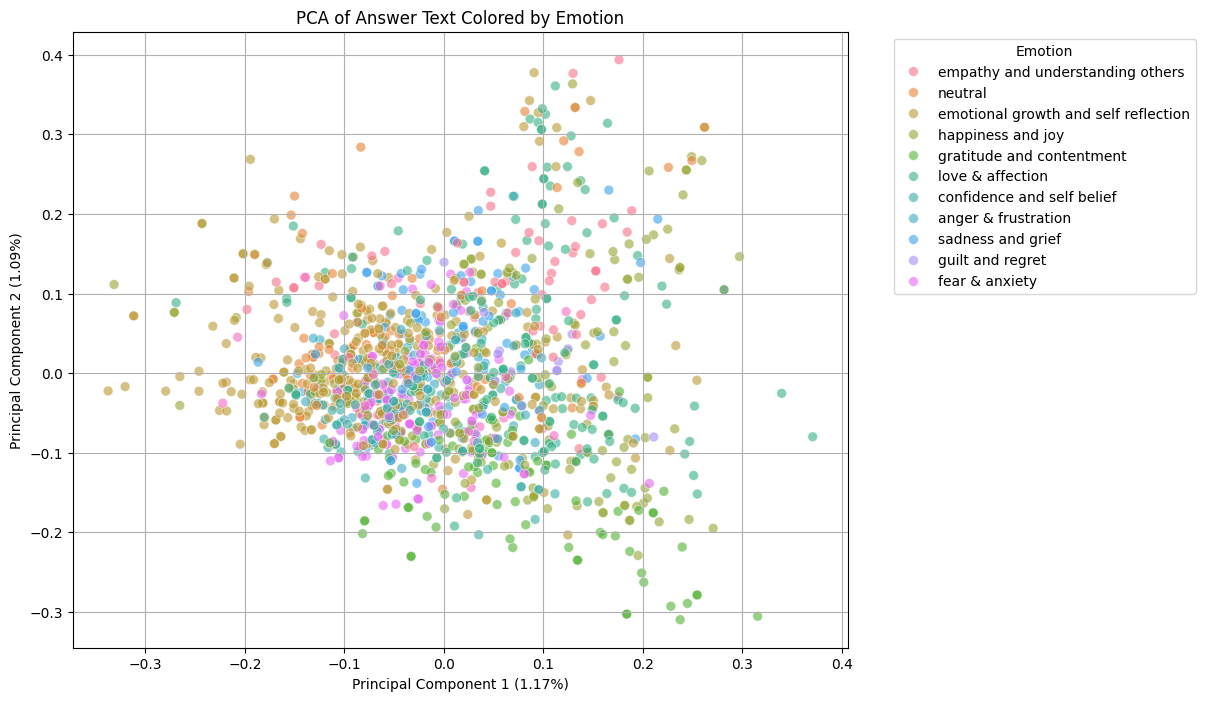

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dimensionality Reduction ---

# Convert 'Answer' text responses into TF-IDF vectors
# Consider parameters like max_features, min_df, max_df, stop_words for better results
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') # Example parameters
# Fit and transform the 'Answer' column. Handle potential missing values.
try:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Answer'].dropna())
    print(f"Original TF-IDF matrix shape: {tfidf_matrix.shape}")
except ValueError as e:
    print(f"Could not create TF-IDF matrix. Error: {e}")
    tfidf_matrix = None # Set to None if vectorization fails

if tfidf_matrix is not None and tfidf_matrix.shape[0] > 1:
    # Apply PCA for dimensionality reduction
    # Reduce to 2 principal components for visualization
    n_components = 2
    if tfidf_matrix.shape[1] >= n_components:
        pca = PCA(n_components=n_components)
        principal_components = pca.fit_transform(tfidf_matrix.toarray()) # PCA works on dense arrays

        # Create a DataFrame with the principal components
        pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

        # Add the Emotion labels to the PCA DataFrame for coloring the plot
        # Need to align the emotion labels with the TF-IDF matrix rows (handle NaNs)
        # Assuming the order of rows in tfidf_matrix corresponds to non-NaN rows in df['Answer']
        pca_df['Emotion'] = df['Emotion'].dropna().reset_index(drop=True)

        # Plot clusters by emotion
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='Emotion', data=pca_df, alpha=0.6, s=50)
        plt.title('PCA of Answer Text Colored by Emotion')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
        plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()

    else:
        print(f"\nCannot perform PCA with {n_components} components. TF-IDF matrix has only {tfidf_matrix.shape[1]} features.")
else:
    print("\nTF-IDF matrix is empty or could not be created. Cannot perform PCA.")

## Correlation & Regression

Correlation Analysis:

Pearson Correlation between Response Length and Tone_encoded: 0.0527 (p-value: 0.0477)
Spearman Correlation between Response Length and Tone_encoded: 0.0462 (p-value: 0.0825)


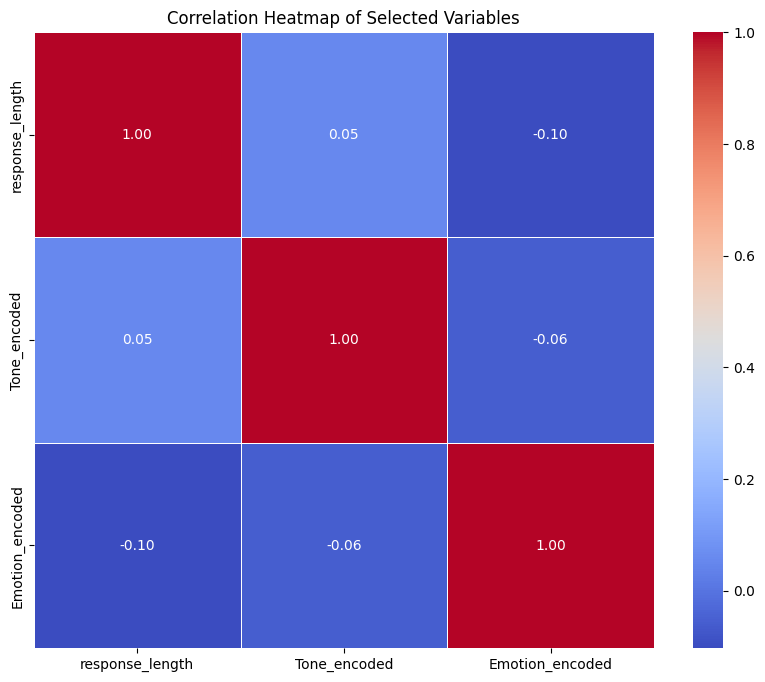


Regression Analysis:

Not enough data or variation in variables to perform Linear Regression.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Correlation Analysis ---

print("Correlation Analysis:")

# Pearson correlation between response_length and Tone_encoded
# (Assuming Tone_encoded is treated as numerical for this test, though Spearman is often more appropriate for encoded categories)
if df['response_length'].nunique() > 1 and df['Tone_encoded'].nunique() > 1:
    pearson_corr, pearson_p_value = pearsonr(df['response_length'], df['Tone_encoded'])
    print(f"\nPearson Correlation between Response Length and Tone_encoded: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
else:
    print("\nNot enough variation in Response Length or Tone_encoded for Pearson Correlation.")


# Spearman correlation between response_length and Tone_encoded
# (More appropriate for ordinal or non-normally distributed numerical data)
if df['response_length'].nunique() > 1 and df['Tone_encoded'].nunique() > 1:
    spearman_corr, spearman_p_value = spearmanr(df['response_length'], df['Tone_encoded'])
    print(f"Spearman Correlation between Response Length and Tone_encoded: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")
else:
     print("Not enough variation in Response Length or Tone_encoded for Spearman Correlation.")


# Correlation Heatmap
# Select numerical or encoded ordinal columns for heatmap
# Exclude original text columns and potentially high-cardinality encoded columns if they clutter the map
correlation_columns = ['response_length', 'Tone_encoded', 'Emotion_encoded'] # Add other relevant numerical columns

# Ensure selected columns exist in the DataFrame
correlation_columns_exist = [col for col in correlation_columns if col in df.columns]

if len(correlation_columns_exist) > 1:
    correlation_matrix = df[correlation_columns_exist].corr(method='pearson') # Use Pearson for linear correlation

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Selected Variables')
    plt.show()
else:
    print("\nNot enough numerical or encoded columns to generate a correlation heatmap.")


# --- Regression Analysis ---

print("\nRegression Analysis:")

# Linear Regression to predict response_length
# Predict response_length using Tone_encoded and Emotion_encoded as predictors
# Add a constant (intercept) to the model
X = df[['Tone_encoded', 'Emotion_encoded']]
X = sm.add_constant(X) # Add an intercept term to the model
y = df['response_length']

# Check if there are enough data points and variation in predictors and target
if len(X) > 1 and X.nunique().min() > 1 and y.nunique() > 1:
    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print the regression summary
    print("\nLinear Regression Model Summary (Predicting Response Length):")
    print(model.summary())

    # Interpret the coefficients (example)
    print("\nRegression Coefficient Interpretation:")
    print(f"  Intercept: {model.params['const']:.4f}")
    if 'Tone_encoded' in model.params:
        print(f"  Coefficient for Tone_encoded: {model.params['Tone_encoded']:.4f}")
        print("    Interpretation: For a one-unit increase in Tone_encoded (holding Emotion_encoded constant), the predicted response length changes by this amount.")
    if 'Emotion_encoded' in model.params:
         print(f"  Coefficient for Emotion_encoded: {model.params['Emotion_encoded']:.4f}")
         print("    Interpretation: For a one-unit increase in Emotion_encoded (holding Tone_encoded constant), the predicted response length changes by this amount.")
else:
    print("\nNot enough data or variation in variables to perform Linear Regression.")

## Hypothesis Testing

In [15]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Hypothesis Testing ---

# Example 1: Independent Samples t-test
# Test if the mean response length differs between two specific emotions (e.g., 'happiness and joy' and 'sadness and grief')
emotion1 = 'happiness and joy'
emotion2 = 'sadness and grief'

# Filter data for the two emotions
response_lengths_emotion1 = df[df['Emotion'] == emotion1]['response_length'].dropna()
response_lengths_emotion2 = df[df['Emotion'] == emotion2]['response_length'].dropna()

# Perform independent samples t-test
# Check if both groups have enough samples (at least 2)
if len(response_lengths_emotion1) > 1 and len(response_lengths_emotion2) > 1:
    t_stat, p_value_ttest = stats.ttest_ind(response_lengths_emotion1, response_lengths_emotion2)

    print(f"Independent Samples t-test for Mean Response Length between '{emotion1}' and '{emotion2}':")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value_ttest:.4f}")

    if p_value_ttest < 0.05:
        print(f"  Result: There is a statistically significant difference in mean response length between '{emotion1}' and '{emotion2}' (p < 0.05).")
    else:
        print(f"  Result: There is no statistically significant difference in mean response length between '{emotion1}' and '{emotion2}' (p >= 0.05).")
else:
    print(f"\nNot enough data for both '{emotion1}' and '{emotion2}' to perform t-test.")


# Example 2: One-Way ANOVA
# Test if the mean response length differs across different emotions
# We need at least two groups with data for ANOVA
if df['Emotion'].nunique() > 1:
    # Create a list of response lengths for each emotion group
    emotion_groups = df.groupby('Emotion')['response_length'].apply(list)
    # Filter out groups with less than 2 samples, as ANOVA requires at least 2 samples per group
    emotion_groups = emotion_groups[emotion_groups.apply(len) > 1]

    if len(emotion_groups) > 1:
        # Perform one-way ANOVA
        f_stat, p_value_anova = stats.f_oneway(*emotion_groups)

        print("\nOne-Way ANOVA for Mean Response Length across Emotions:")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_value_anova:.4f}")

        if p_value_anova < 0.05:
            print("  Result: There is a statistically significant difference in mean response length across different emotions (p < 0.05).")
        else:
            print("  Result: There is no statistically significant difference in mean response length across different emotions (p >= 0.05).")
    else:
        print("\nNot enough emotion groups with sufficient data to perform ANOVA.")
else:
     print("\nOnly one unique emotion found. Cannot perform ANOVA.")


# Example 3: Chi-Square Test of Independence
# Test for a relationship between Tone and Emotion
# We need a contingency table of observed frequencies
contingency_table = pd.crosstab(df['Tone'], df['Emotion'])

# Perform Chi-Square test
# Check if the contingency table is not empty
if not contingency_table.empty:
    chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

    print("\nChi-Square Test of Independence for Tone and Emotion:")
    print(f"  Chi2 Statistic: {chi2_stat:.4f}")
    print(f"  P-value: {p_value_chi2:.4f}")
    print(f"  Degrees of Freedom: {dof}")

    if p_value_chi2 < 0.05:
        print("  Result: There is a statistically significant relationship between Tone and Emotion (p < 0.05).")
    else:
        print("  Result: There is no statistically significant relationship between Tone and Emotion (p >= 0.05).")
else:
    print("\nContingency table for Tone and Emotion is empty. Cannot perform Chi-Square test.")


# Example 4: Correlation Test (Pearson)
# Test for correlation between response length and Tone_encoded (assuming Tone_encoded is somewhat meaningful as ordinal)
# Pearson correlation is for linear relationships between numerical variables.
# Since Tone_encoded is an encoded categorical variable, Spearman correlation might be more appropriate,
# but we'll show Pearson as requested in the project outline.
# Ensure there are enough data points (at least 2)
if len(df['response_length'].dropna()) > 1 and len(df['Tone_encoded'].dropna()) > 1:
    pearson_corr, p_value_pearson = stats.pearsonr(df['response_length'], df['Tone_encoded'])

    print("\nPearson Correlation Test between Response Length and Tone_encoded:")
    print(f"  Pearson Correlation Coefficient: {pearson_corr:.4f}")
    print(f"  P-value: {p_value_pearson:.4f}")

    if p_value_pearson < 0.05:
        print("  Result: There is a statistically significant linear correlation between Response Length and Tone_encoded (p < 0.05).")
    else:
        print("  Result: There is no statistically significant linear correlation between Response Length and Tone_encoded (p >= 0.05).")
else:
    print("\nNot enough data for Response Length and Tone_encoded to perform Pearson correlation test.")


# Example 5: Correlation Test (Spearman)
# Spearman correlation is more robust to non-normality and can be used for ordinal data.
# Test for correlation between response length and Tone_encoded using Spearman
# Ensure there are enough data points (at least 2)
if len(df['response_length'].dropna()) > 1 and len(df['Tone_encoded'].dropna()) > 1:
    spearman_corr, p_value_spearman = stats.spearmanr(df['response_length'], df['Tone_encoded'])

    print("\nSpearman Correlation Test between Response Length and Tone_encoded:")
    print(f"  Spearman Correlation Coefficient: {spearman_corr:.4f}")
    print(f"  P-value: {p_value_spearman:.4f}")

    if p_value_spearman < 0.05:
        print("  Result: There is a statistically significant monotonic correlation between Response Length and Tone_encoded (p < 0.05).")
    else:
        print("  Result: There is no statistically significant monotonic correlation between Response Length and Tone_encoded (p >= 0.05).")
else:
    print("\nNot enough data for Response Length and Tone_encoded to perform Spearman correlation test.")

Independent Samples t-test for Mean Response Length between 'happiness and joy' and 'sadness and grief':
  T-statistic: -1.4195
  P-value: 0.1569
  Result: There is no statistically significant difference in mean response length between 'happiness and joy' and 'sadness and grief' (p >= 0.05).

One-Way ANOVA for Mean Response Length across Emotions:
  F-statistic: 3.9487
  P-value: 0.0000
  Result: There is a statistically significant difference in mean response length across different emotions (p < 0.05).

Chi-Square Test of Independence for Tone and Emotion:
  Chi2 Statistic: 8785.7919
  P-value: 0.0000
  Degrees of Freedom: 7854
  Result: There is a statistically significant relationship between Tone and Emotion (p < 0.05).

Pearson Correlation Test between Response Length and Tone_encoded:
  Pearson Correlation Coefficient: 0.0527
  P-value: 0.0477
  Result: There is a statistically significant linear correlation between Response Length and Tone_encoded (p < 0.05).

Spearman Correla

## Sampling & Estimation

In [14]:
# Randomly sample subsets (e.g., 30%)
sample_fraction = 0.3
sample_df = df.sample(frac=sample_fraction, random_state=42) # Using random_state for reproducibility

print(f"Original DataFrame size: {len(df)}")
print(f"Sampled DataFrame size ({sample_fraction*100}%): {len(sample_df)}")
display(sample_df.head())

# Estimate mean response length from the sample
sample_mean_response_length = sample_df['response_length'].mean()
print(f"\nEstimated Mean Response Length (from sample): {sample_mean_response_length:.2f}")

# Estimate emotion proportions from the sample
sample_emotion_proportions = sample_df['Emotion'].value_counts(normalize=True)
print("\nEstimated Emotion Proportions (from sample):")
display(sample_emotion_proportions)

# Build 95% confidence intervals for the mean response length
# Need the standard error of the mean (SEM)
sem_response_length = sample_df['response_length'].sem()
confidence_level = 0.95
# Degrees of freedom for t-distribution: n - 1
degrees_freedom = len(sample_df) - 1

if degrees_freedom > 0:
    # Calculate the margin of error using the t-distribution (more appropriate for smaller samples, but works for larger too)
    margin_of_error = stats.t.interval(confidence_level, degrees_freedom, loc=sample_mean_response_length, scale=sem_response_length)[1] - sample_mean_response_length

    confidence_interval_response_length = (sample_mean_response_length - margin_of_error, sample_mean_response_length + margin_of_error)

    print(f"\n95% Confidence Interval for Mean Response Length: {confidence_interval_response_length}")
else:
    print("\nCannot compute confidence interval with a sample size of 1 or less.")


# Build 95% confidence intervals for emotion proportions (using Normal approximation for proportions)
# This is an approximation and works best for large sample sizes and proportions not too close to 0 or 1.
print("\n95% Confidence Intervals for Emotion Proportions:")

# Calculate confidence interval for each emotion
emotion_ci = {}
total_sample_size = len(sample_df)

for emotion, proportion in sample_emotion_proportions.items():
    if total_sample_size > 0:
        # Standard error for proportion: sqrt(p * (1-p) / n)
        standard_error_proportion = np.sqrt(proportion * (1 - proportion) / total_sample_size)

        # Using z-score for 95% confidence (approx. 1.96)
        z_score = stats.norm.ppf((1 + confidence_level) / 2)
        margin_of_error_proportion = z_score * standard_error_proportion

        lower_bound = proportion - margin_of_error_proportion
        upper_bound = proportion + margin_of_error_proportion

        # Ensure bounds are within [0, 1]
        lower_bound = max(0, lower_bound)
        upper_bound = min(1, upper_bound)

        emotion_ci[emotion] = (lower_bound, upper_bound)
    else:
        emotion_ci[emotion] = (np.nan, np.nan) # Cannot compute for empty sample

# Display confidence intervals for proportions
for emotion, ci in emotion_ci.items():
    print(f"  {emotion}: ({ci[0]:.4f}, {ci[1]:.4f})")

Original DataFrame size: 1411
Sampled DataFrame size (30.0%): 423


,Question,Tone,Emotion,Answer,response_length,Tone_encoded,Emotion_encoded
353,How do you adjust your non-verbal cues to make...,stammers slightly,happiness and joy,"To make others feel more comfortable, I use fa...",29,590,8
864,"You are in a crowded room, but still feel alon...",direct,emotional growth and self reflection,"If I feel alone in a crowded room, I'd ask to ...",16,173,3
1312,How do you typically cope with feelings of lon...,thinking,emotional growth and self reflection,"I used to feel lonely before college, especial...",34,617,3
192,How do you typically cope with feelings of lon...,reflective,love & affection,"Whenever I feel lonely, I usually talk to my m...",20,468,9
782,How do you typically cope with feelings of lon...,"spiritual, situational awareness, simple",love & affection,"To cope with feelings of loneliness, I listen ...",36,587,9



Estimated Mean Response Length (from sample): 30.48

Estimated Emotion Proportions (from sample):


,proportion
Emotion,
emotional growth and self reflection,0.248227
happiness and joy,0.158392
love & affection,0.130024
fear & anxiety,0.096927
gratitude and contentment,0.066194
sadness and grief,0.063830
neutral,0.059102
empathy and understanding others,0.049645
confidence and self belief,0.047281



95% Confidence Interval for Mean Response Length: (np.float64(29.592671442471005), np.float64(31.36713943223349))

95% Confidence Intervals for Emotion Proportions:
  emotional growth and self reflection: (0.2071, 0.2894)
  happiness and joy: (0.1236, 0.1932)
  love & affection: (0.0980, 0.1621)
  fear & anxiety: (0.0687, 0.1251)
  gratitude and contentment: (0.0425, 0.0899)
  sadness and grief: (0.0405, 0.0871)
  neutral: (0.0366, 0.0816)
  empathy and understanding others: (0.0289, 0.0703)
  confidence and self belief: (0.0271, 0.0675)
  anger & frustration: (0.0215, 0.0589)
  : (0.0108, 0.0412)
  guilt and regret: (0.0029, 0.0255)


## Probability & Bayes

In [13]:
from scipy import stats
import numpy as np

# Compute P(Emotion)
print("Probability Distribution of Emotions:")
emotion_probabilities = df['Emotion'].value_counts(normalize=True)
display(emotion_probabilities)

# Compute P(Tone)
print("\nProbability Distribution of Tones:")
tone_probabilities = df['Tone'].value_counts(normalize=True)
display(tone_probabilities)

# Compute conditional probabilities P(Emotion | Tone) - Example for a specific Tone
# Let's pick a common tone, e.g., 'direct' (adjust if 'direct' is not common)
# Find a tone that exists in tone_counts
example_tone = tone_counts.index[0] if not tone_counts.empty else None

if example_tone:
    print(f"\nConditional Probability P(Emotion | Tone = '{example_tone}'):")
    df_filtered_by_tone = df[df['Tone'] == example_tone]
    if not df_filtered_by_tone.empty:
        conditional_emotion_probabilities = df_filtered_by_tone['Emotion'].value_counts(normalize=True)
        display(conditional_emotion_probabilities)
    else:
        print(f"No entries found for tone '{example_tone}'. Cannot compute conditional probability.")
else:
    print("\nNo tones found in the data to compute conditional probability.")


# Fit Normal distribution on response lengths
# Check if response length data is suitable for Normal distribution fitting (e.g., not all identical)
if df['response_length'].nunique() > 1:
    mu, std = stats.norm.fit(df['response_length'])
    print(f"\nFitted Normal distribution to Response Length: mu = {mu:.2f}, std = {std:.2f}")

    # Test for normality (Shapiro-Wilk test)
    # Shapiro-Wilk test is suitable for small to moderate sample sizes.
    # For larger sample sizes, other tests like Anderson-Darling might be more appropriate.
    # Given the dataset size (~1400), Shapiro-Wilk might be sensitive to deviations from normality.
    shapiro_test = stats.shapiro(df['response_length'])
    print(f"Shapiro-Wilk test for normality on Response Length: Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print("Result: Data likely follows a normal distribution (p > 0.05)")
    else:
        print("Result: Data likely does not follow a normal distribution (p <= 0.05)")
else:
    print("\nResponse length data is constant, cannot fit Normal distribution or perform normality test.")


# Fit Poisson distribution on response lengths (Response length is count data, but often not strictly Poisson)
# Poisson distribution assumes mean = variance. Let's check that first.
mean_response_length = df['response_length'].mean()
variance_response_length = df['response_length'].var()
print(f"\nResponse Length Mean: {mean_response_length:.2f}, Variance: {variance_response_length:.2f}")

# If mean and variance are roughly equal, Poisson might be a reasonable fit.
# We can fit the Poisson distribution using the mean as lambda.
lambda_poisson = mean_response_length
print(f"Fitted Poisson distribution to Response Length: lambda = {lambda_poisson:.2f}")

# Note: Formally testing goodness-of-fit for Poisson would require a chi-squared test,
# which involves binning the data and comparing observed vs. expected frequencies.
# This is more complex and might not be necessary depending on the analysis goals.


# Apply Bayes’ theorem for predicting emotion from tone (Example)
# P(Emotion | Tone) = [P(Tone | Emotion) * P(Emotion)] / P(Tone)
# We have P(Emotion) and P(Tone) from value_counts(normalize=True)

# To compute P(Tone | Emotion), we can do value_counts(normalize=True) on Tone for each Emotion.
print("\nApplying Bayes' Theorem (Example: Predicting Emotion for a given Tone)")

# Let's pick an example tone and calculate the probability of each emotion given that tone.
# We'll use the same example_tone as before.
if example_tone:
    print(f"Predicting Emotion for Tone = '{example_tone}':")
    # Calculate P(Tone | Emotion) for each emotion
    emotion_tone_counts = df.groupby('Emotion')['Tone'].value_counts(normalize=True).unstack(fill_value=0)

    if example_tone in emotion_tone_counts.columns:
        p_tone = tone_probabilities.get(example_tone, 0)
        if p_tone > 0:
            predicted_emotion_probs = (emotion_tone_counts[example_tone] * emotion_probabilities) / p_tone
            # Normalize to sum to 1 (due to potential floating point inaccuracies or if considering only a subset of tones/emotions)
            predicted_emotion_probs = predicted_emotion_probs / predicted_emotion_probs.sum()
            display(predicted_emotion_probs.sort_values(ascending=False))
        else:
            print(f"Probability of tone '{example_tone}' is zero, cannot apply Bayes' theorem.")
    else:
         print(f"Tone '{example_tone}' not found in the grouped emotion-tone counts.")
else:
    print("No tones found in the data to apply Bayes' theorem.")

Probability Distribution of Emotions:


,proportion
Emotion,
emotional growth and self reflection,0.229624
happiness and joy,0.138909
love & affection,0.135365
fear & anxiety,0.100638
neutral,0.077250
gratitude and contentment,0.063785
sadness and grief,0.063076
anger & frustration,0.060950
confidence and self belief,0.053154



Probability Distribution of Tones:


,proportion
Tone,
direct,0.062367
calm,0.029766
thoughtful,0.023388
confident,0.022679
clear,0.016300
...,...
"thoughtful,direct",0.000709
"relaxed, casual",0.000709
"enthusiastic, excited",0.000709



Conditional Probability P(Emotion | Tone = 'direct'):


,proportion
Emotion,
love & affection,0.215909
emotional growth and self reflection,0.204545
happiness and joy,0.181818
neutral,0.090909
sadness and grief,0.090909
gratitude and contentment,0.079545
anger & frustration,0.079545
fear & anxiety,0.034091
guilt and regret,0.011364



Fitted Normal distribution to Response Length: mu = 30.66, std = 9.57
Shapiro-Wilk test for normality on Response Length: Statistic = 0.9633, p-value = 0.0000
Result: Data likely does not follow a normal distribution (p <= 0.05)

Response Length Mean: 30.66, Variance: 91.69
Fitted Poisson distribution to Response Length: lambda = 30.66

Applying Bayes' Theorem (Example: Predicting Emotion for a given Tone)
Predicting Emotion for Tone = 'direct':


,0
Emotion,
love & affection,0.215909
emotional growth and self reflection,0.204545
happiness and joy,0.181818
neutral,0.090909
sadness and grief,0.090909
gratitude and contentment,0.079545
anger & frustration,0.079545
fear & anxiety,0.034091
guilt and regret,0.011364


## Descriptive Statistics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud

# Descriptive statistics for response length
print("Descriptive Statistics for Response Length:")
display(df['response_length'].describe())

# Frequency of emotions
print("\nFrequency of Emotions:")
emotion_counts = df['Emotion'].value_counts()
display(emotion_counts)

# Frequency of tones
print("\nFrequency of Tones:")
tone_counts = df['Tone'].value_counts()
display(tone_counts)

# Frequency of response times (assuming it's a categorical or binned variable)
# If 'Response_Time' is numerical, you might want to analyze its distribution instead
print("\nFrequency of Response Times:")
# Assuming Response_Time is a string like 'Fast', 'Medium', 'Slow'
if df['Response_Time'].dtype == 'object':
    response_time_counts = df['Response_Time'].value_counts()
    display(response_time_counts)
else:
    print("Response_Time is not a categorical variable. Showing descriptive stats:")
    display(df['Response_Time'].describe())


# Visualizations

# Histogram of response lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.show()

# Bar chart of emotion frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Frequency of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart of tone frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=tone_counts.index, y=tone_counts.values)
plt.title('Frequency of Tones')
plt.xlabel('Tone')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart of response time frequencies (if categorical)
if df['Response_Time'].dtype == 'object':
    plt.figure(figsize=(12, 6))
    sns.barplot(x=response_time_counts.index, y=response_time_counts.values)
    plt.title('Frequency of Response Times')
    plt.xlabel('Response Time')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Word Cloud of Answers (optional, requires combining all answers)
all_answers = " ".join(df['Answer'].dropna())
if all_answers:
    wordcloud_img = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(all_answers)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_img, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Answers')
    plt.show()
else:
    print("\nNo answers available to generate word cloud.")

Descriptive Statistics for Response Length:


NameError: name 'df' is not defined